In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
metaDataDF = pd.read_csv("../artifacts/data_ingestion/kidneyData.csv")
metaDataDF.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


In [3]:
metaDataDF.drop('Unnamed: 0', axis=1, inplace=True)

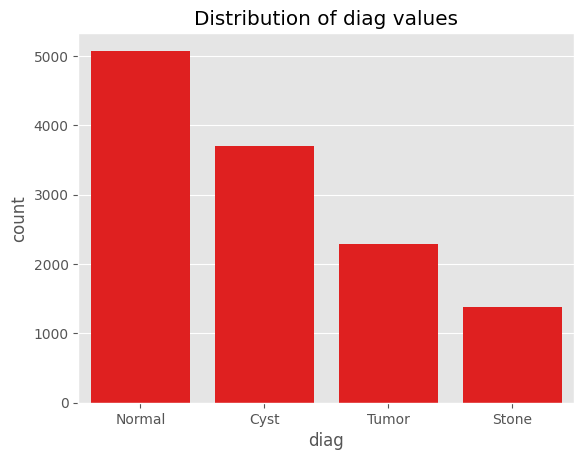

In [4]:
sns.countplot(data=metaDataDF,x='diag',color='r',order=metaDataDF['diag'].value_counts().index)
plt.title("Distribution of diag values")
plt.show()

In [5]:
metaDataDF['Class'].value_counts()

Class
Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: count, dtype: int64

target
1    5077
0    3709
3    2283
2    1377
Name: count, dtype: int64


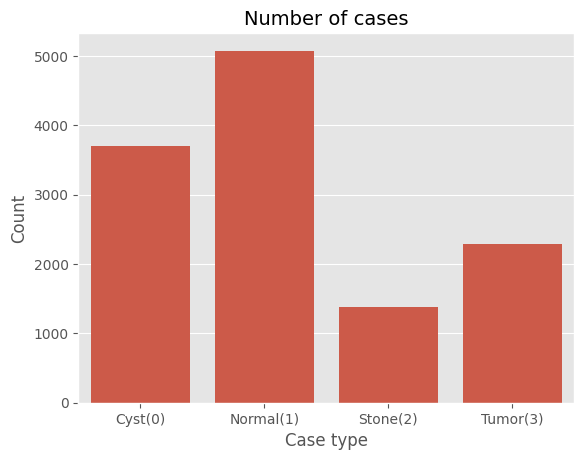

In [6]:
targetCounts = metaDataDF['target'].value_counts()
print(targetCounts)
sns.barplot(x=targetCounts.index, y=targetCounts.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(targetCounts.index)), ['Cyst(0)','Normal(1)', 'Stone(2)', 'Tumor(3)'])
plt.show()

In [7]:
metaDataDF.isnull().sum()

image_id    0
path        0
diag        0
target      0
Class       0
dtype: int64

## Reading Images

In [8]:
from glob import glob
imgPath = "../artifacts/data_ingestion/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/"
cystfiles = glob(imgPath + "Cyst/*.jpg")
normalFiles = glob(imgPath + "Normal/*.jpg")
stoneFiles = glob(imgPath + "Stone/*.jpg")
tumorFiles = glob(imgPath + "Tumor/*.jpg")

In [9]:
import cv2

In [10]:

cyst_img_mpl = plt.imread(cystfiles[20])
norm_img_mpl = plt.imread(normalFiles[20])
stone_img_cv2 = cv2.imread(stoneFiles[20])
tum_img_cv2 = cv2.imread(tumorFiles[20])
print(cyst_img_mpl.shape)
print(norm_img_mpl.shape)
print(stone_img_cv2.shape)
print(tum_img_cv2.shape)


(512, 512, 3)
(634, 785, 3)
(640, 790, 3)
(512, 512, 3)


In [11]:
cyst_img_mpl

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## Image As Numpy Array
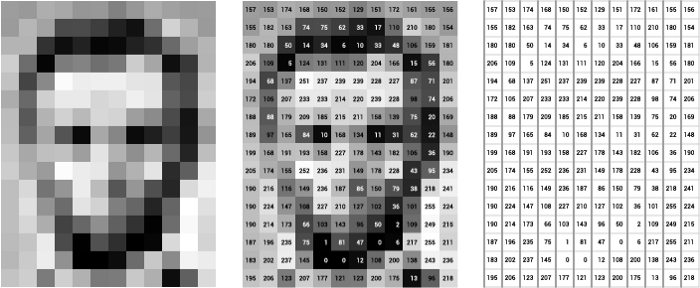

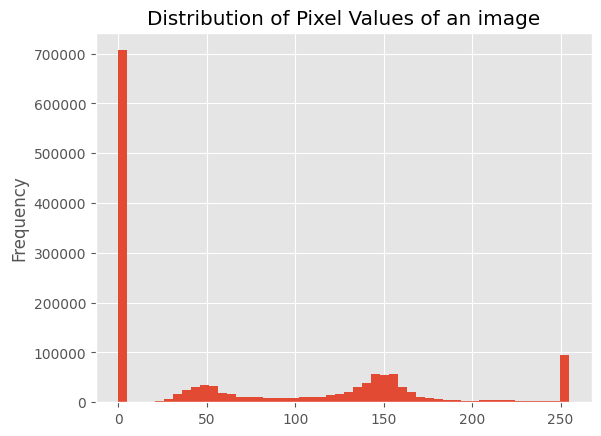

In [12]:
pd.Series(norm_img_mpl.flatten()).plot(kind='hist',
                                  bins=50,
                                  title='Distribution of Pixel Values of an image')
plt.show()

## Displaying Images

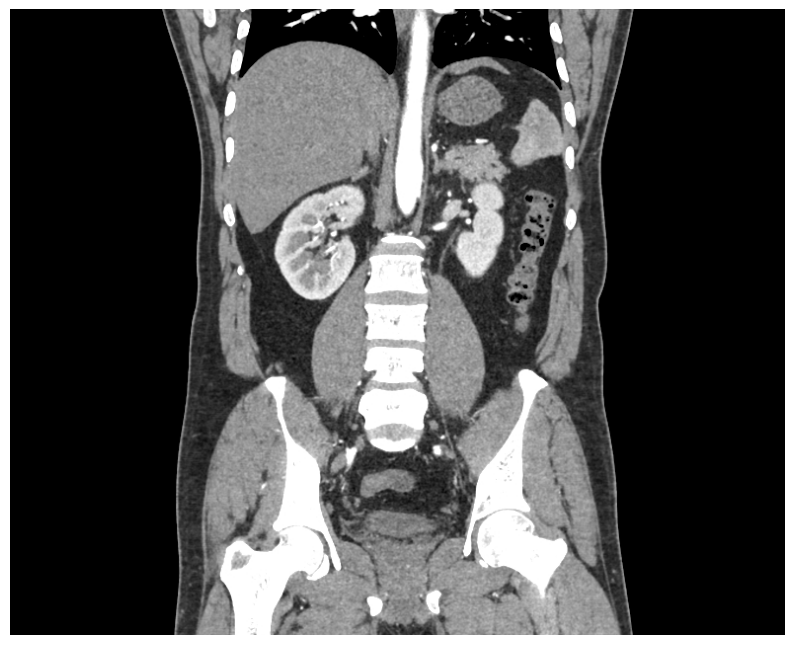

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(norm_img_mpl)
ax.axis('off')
plt.show()

## Image Channels
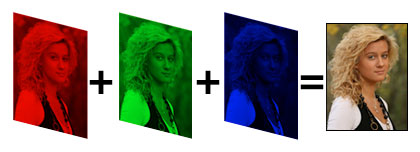

Basically images has three channels: red, green, and blue.<br> RGB channels roughly follow the color receptors in the human eye, and are used in computer displays and image scanners.<br> These channels forms the final colorful image that we see with the human eye.<br>

References: https://www.theclickreader.com/the-convolution-pooling-operation-for-rgb-images/

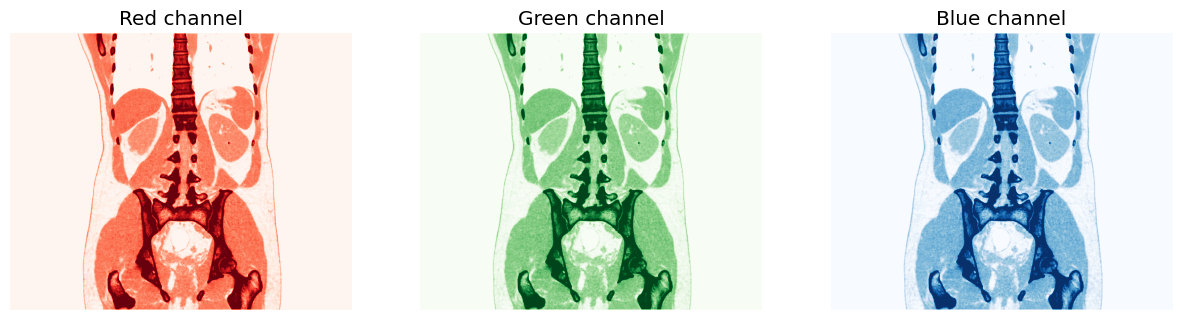

In [14]:
# Display RGB Channels of cv2 image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(stone_img_cv2[:,:,0], cmap='Reds')
axs[1].imshow(stone_img_cv2[:,:,1], cmap='Greens')
axs[2].imshow(stone_img_cv2[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

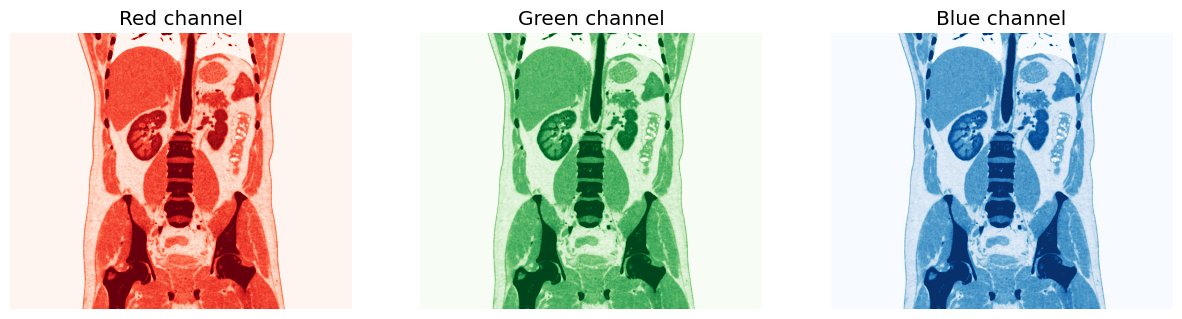

In [15]:
# Display RGB Channels of matplotlib image
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(norm_img_mpl[:,:,0], cmap='Reds')
axs[1].imshow(norm_img_mpl[:,:,1], cmap='Greens')
axs[2].imshow(norm_img_mpl[:,:,2], cmap='Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')
plt.show()

In [19]:
len(cystfiles)

3709

## Spliting Image Data into train , test and validation sets
* Format of the folders to split the images into train , test and validation sets <br>
The input folder should have the following format: <br>
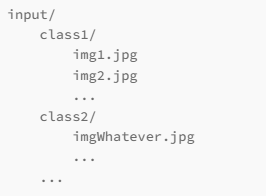 <br>
The output folder should have the following format: <br>
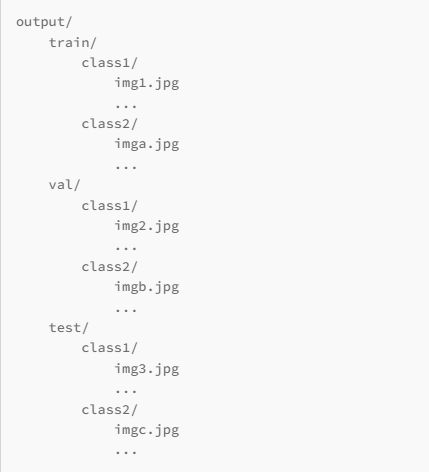


In [24]:
import splitfolders, os

In [25]:
print(os.listdir(imgPath))

['Cyst', 'Normal', 'Stone', 'Tumor']


In [26]:
splitfolders.ratio(imgPath,seed=1337, output="data-Splitted", ratio=(0.6, 0.2, 0.2))

Copying files: 12446 files [05:46, 35.89 files/s]


In [59]:
testPath = imgPath + "/data-Splitted/test"
test_dir = os.listdir(testPath)
trainPath = imgPath + "/data-Splitted/train"
train_dir = os.listdir(trainPath)
valPath = imgPath + "/data-Splitted/val"
val_dir = os.listdir(valPath)
print(testPath, test_dir)
print(trainPath, train_dir)
print(valPath, val_dir)

../artifacts/data_ingestion/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone//data-Splitted/test ['Cyst', 'Normal', 'Stone', 'Tumor']
../artifacts/data_ingestion/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone//data-Splitted/train ['Cyst', 'Normal', 'Stone', 'Tumor']
../artifacts/data_ingestion/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone//data-Splitted/val ['Cyst', 'Normal', 'Stone', 'Tumor']


In [88]:
def imageCount(fPath):
    imgList = [len(glob(fPath + "/" + ele + "/*.jpg")) for ele in os.listdir(fPath)]
    imgSum = sum(imgList)
    return imgSum, imgList

In [89]:
trainCount, trainList = imageCount(trainPath)
print("Total number of images in {} directory : {}".format("TRAIN",trainCount))
valCount, valList = imageCount(valPath)
print("Total number of images in {} directory : {}".format("VALIDATION",valCount))
testCount, testList = imageCount(testPath)
print("Total number of images in {} directory : {}".format("TEST",testCount))

Total number of images in TRAIN directory : 7466
Total number of images in VALIDATION directory : 2487
Total number of images in TEST directory : 2493


In [105]:
imgNameList = ['Cyst','Normal','Stone','Tumor']
trainDict = dict(zip(imgNameList, trainList))
print(trainDict)
valDict = dict(zip(imgNameList, valList))
print(valDict)
testDict = dict(zip(imgNameList, testList))
print(testDict)

{'Cyst': 2225, 'Normal': 3046, 'Stone': 826, 'Tumor': 1369}
{'Cyst': 741, 'Normal': 1015, 'Stone': 275, 'Tumor': 456}
{'Cyst': 743, 'Normal': 1016, 'Stone': 276, 'Tumor': 458}


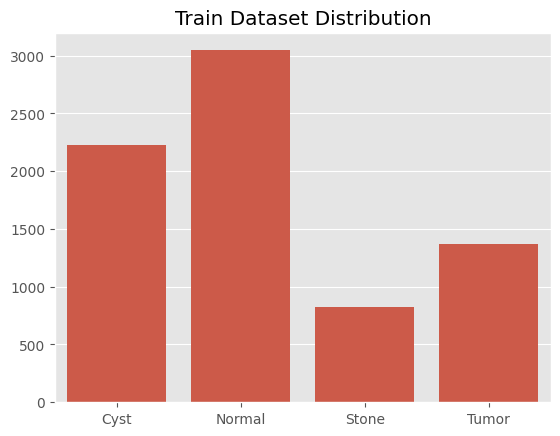

In [106]:
sns.barplot(data=trainDict, x=trainDict.keys(), y=trainDict.values())
plt.title("Train Dataset Distribution")
plt.show()

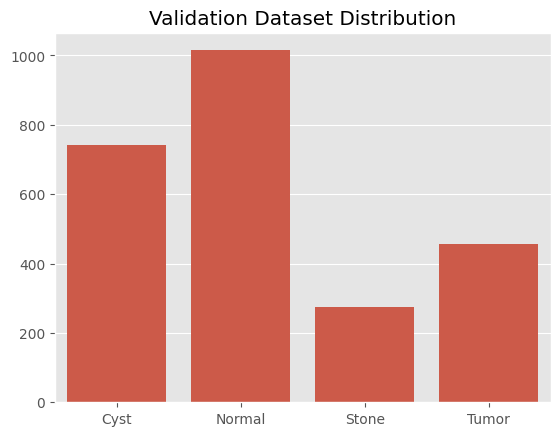

In [107]:
sns.barplot(data=valDict, x=valDict.keys(), y=valDict.values())
plt.title("Validation Dataset Distribution")
plt.show()

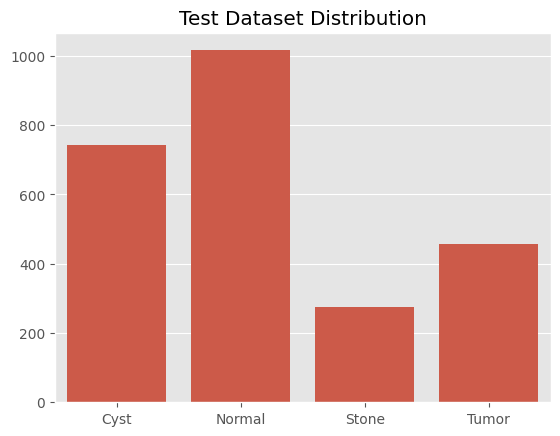

In [108]:
sns.barplot(data=testDict, x=testDict.keys(), y=testDict.values())
plt.title("Test Dataset Distribution")
plt.show()